<a href="https://colab.research.google.com/github/leah-sibi/Machine-Learning/blob/master/Selling_bank_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**On The Dataset**

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


# Importing Datasets and Libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [229]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (2).xlsx


In [230]:
data = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx','Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]


In [231]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**Observation:**  Displays the first five columns

In [232]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Observation:**  Displays the last five columns

In [233]:
data.shape

(5000, 14)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [235]:
data.isnull().any()

ID                   False
Age                  False
Experience           False
Income               False
ZIPCode              False
Family               False
CCAvg                False
Education            False
Mortgage             False
PersonalLoan         False
SecuritiesAccount    False
CDAccount            False
Online               False
CreditCard           False
dtype: bool

**Observation:** No columns have null data in the file

In [236]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Observation:** We can see that 
1. There are 5000 rows and 14 attributes.
2. No null values are present.
3. Experience can't be negetive but data is showing it.So we have to clean this attribute.

So let's check whether Age and Experience are correlated

# Cleaning Irrelevant datas

In [237]:
data['Experience'].corr(data['Age'])

0.9942148569683321

In [238]:
corr=data.corr(method='pearson')
corr

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


**Observation:** we can see that age and experience are highly correlated.Experience column needs to be cleaned because it contain negetive values

In [239]:
data=data.drop(['ID','Experience'],axis=1)
data

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


# EDA

In [240]:
#finding unique data
data.nunique()

Age                   45
Income               162
ZIPCode              467
Family                 4
CCAvg                108
Education              3
Mortgage             347
PersonalLoan           2
SecuritiesAccount      2
CDAccount              2
Online                 2
CreditCard             2
dtype: int64

Now let's find out the number of values for various columns that have categorical values like Family,Education,PersonalLoan,Securities Account,CDAccount,Online,Credit Card.   

In [241]:
l=['Family','Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']
for col in l:
  print(col)
  print(data[col].value_counts())
  print("--"*20)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
PersonalLoan
0    4520
1     480
Name: PersonalLoan, dtype: int64
----------------------------------------
SecuritiesAccount
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
----------------------------------------
CDAccount
0    4698
1     302
Name: CDAccount, dtype: int64
----------------------------------------
Online
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------


Now lets plot the graph for each data

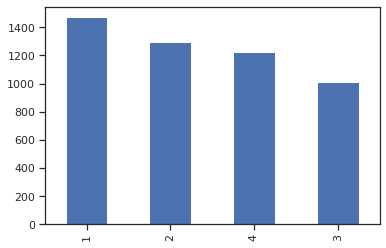

In [242]:
data['Family'].value_counts().plot(kind='bar')

**Observation:** Here we can conclude the family size of the customer.Most of the customers are single

lets check education status now

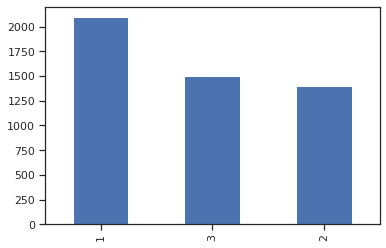

In [243]:
data['Education'].value_counts().plot(kind='bar')

**Observation:** It seems that about 2096 of the customers are undergraduate.After this professionals are more than graduate(1245).

lets check personal loan status now

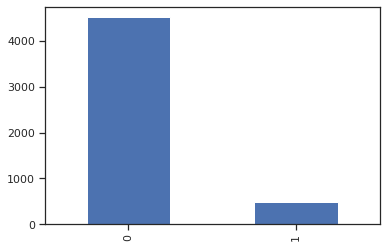

In [244]:
data['PersonalLoan'].value_counts().plot(kind='bar')

**Observation:**It seems that only 480 people from 5000 has acquired the loan.That is only 9.6% of total persons has acquired the loan

lets check CDAccount status now

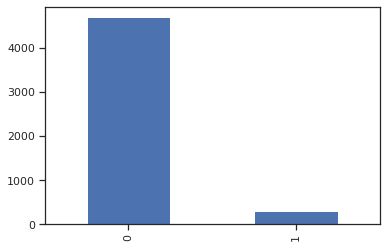

In [245]:
data['CDAccount'].value_counts().plot(kind='bar')

**Observation:**It seems that only 302 people from 5000 has this account.That is only 6.4% of total customers has it.

lets check Securities account status now

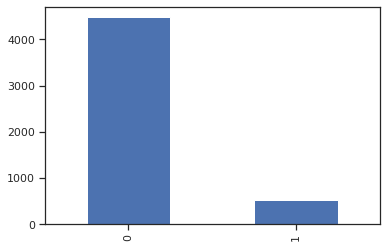

In [ ]:
data['SecuritiesAccount'].value_counts().plot(kind='bar')

**Observation:**It seems that only 522 people from 5000 has this account.That is only 10.4% of total customers has it.

lets check Online status now



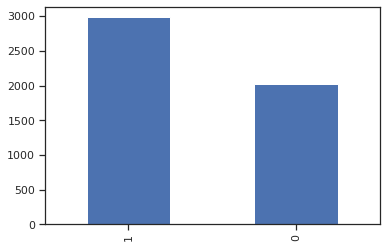

In [246]:
data['Online'].value_counts().plot(kind='bar')

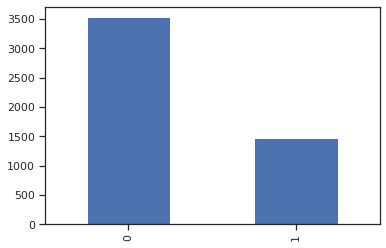

In [247]:
data['CreditCard'].value_counts().plot(kind='bar')

In [248]:
#Number of people with zero mortage
(data.Mortgage == 0) .sum()

3462

In [249]:
#Number of people with zero credit card spending per month
(data.CCAvg == 0) .sum()

106

# Univariate and Bivariate Aanalysis

In univariate analysis we have to analyse a single variable and the best plot for analysing it is the displot, which shows the distribution of numerical variable.

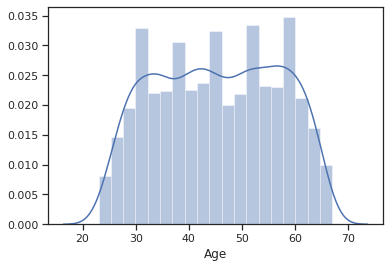

In [250]:
#numerical analysis of age variable
sns.distplot(data.Age);

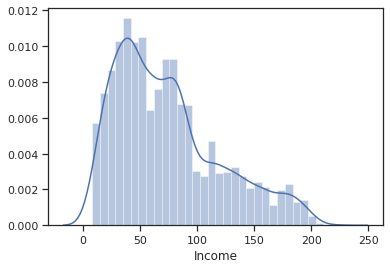

In [251]:
sns.distplot(data.Income);

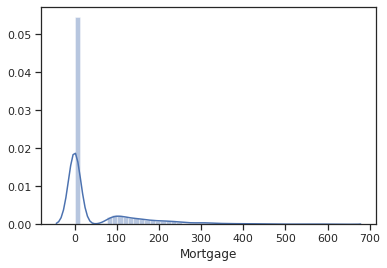

In [ ]:
sns.distplot(data.Mortgage);

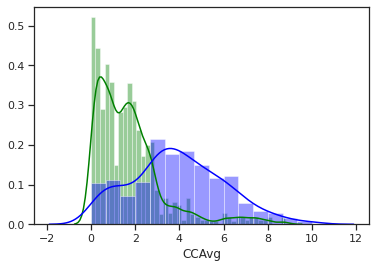

In [ ]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'green')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'blue')

**Observations:**We can see that CCAvg and Income are not normalized so we have to normalize these varuables before using them in the model.

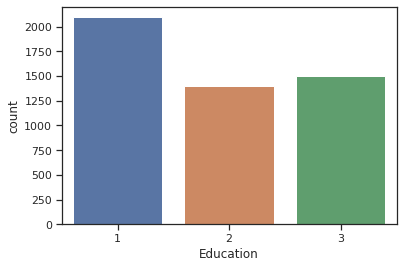

In [ ]:
sns.countplot(data.Education);

**Observation:** It seems that most of the customers are undergraduate and there are many professionals than graduate.

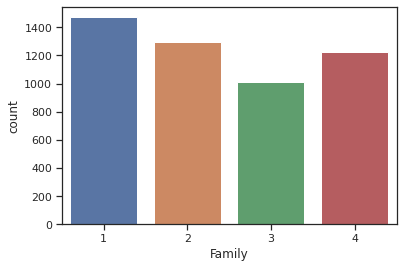

In [ ]:
sns.countplot(data.Family);

**Observation:** Here we can conclude the family size of the customer.Most of the customers are single

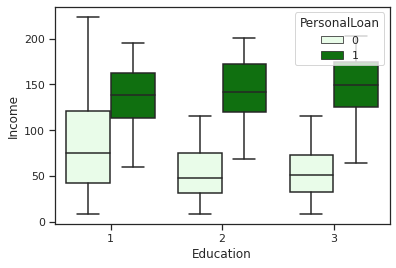

In [ ]:
#It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data,color='green')

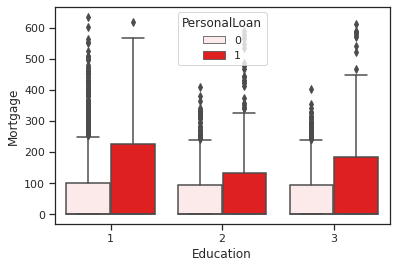

In [ ]:
#it seems that customer who do not have personal loan and customer who has personal loan have high mortgage
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='red')


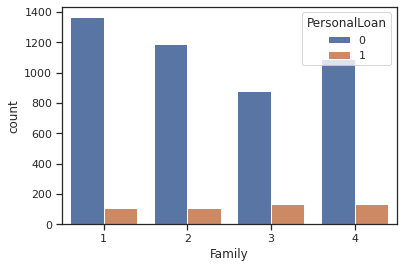

In [ ]:
# It seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.
sns.countplot(x='Family',data=data,hue='PersonalLoan')

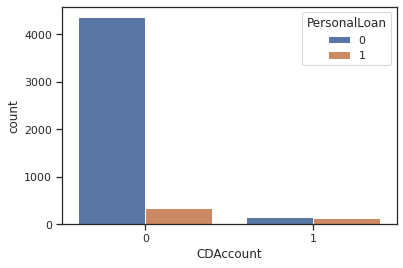

In [ ]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

**Observation**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

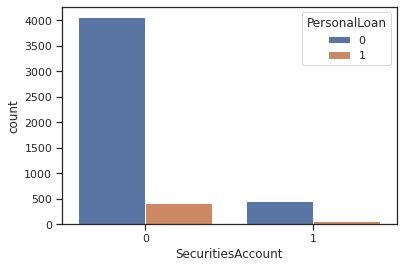

In [ ]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

**Observation :** Majority of customers who does not have loan have securities account

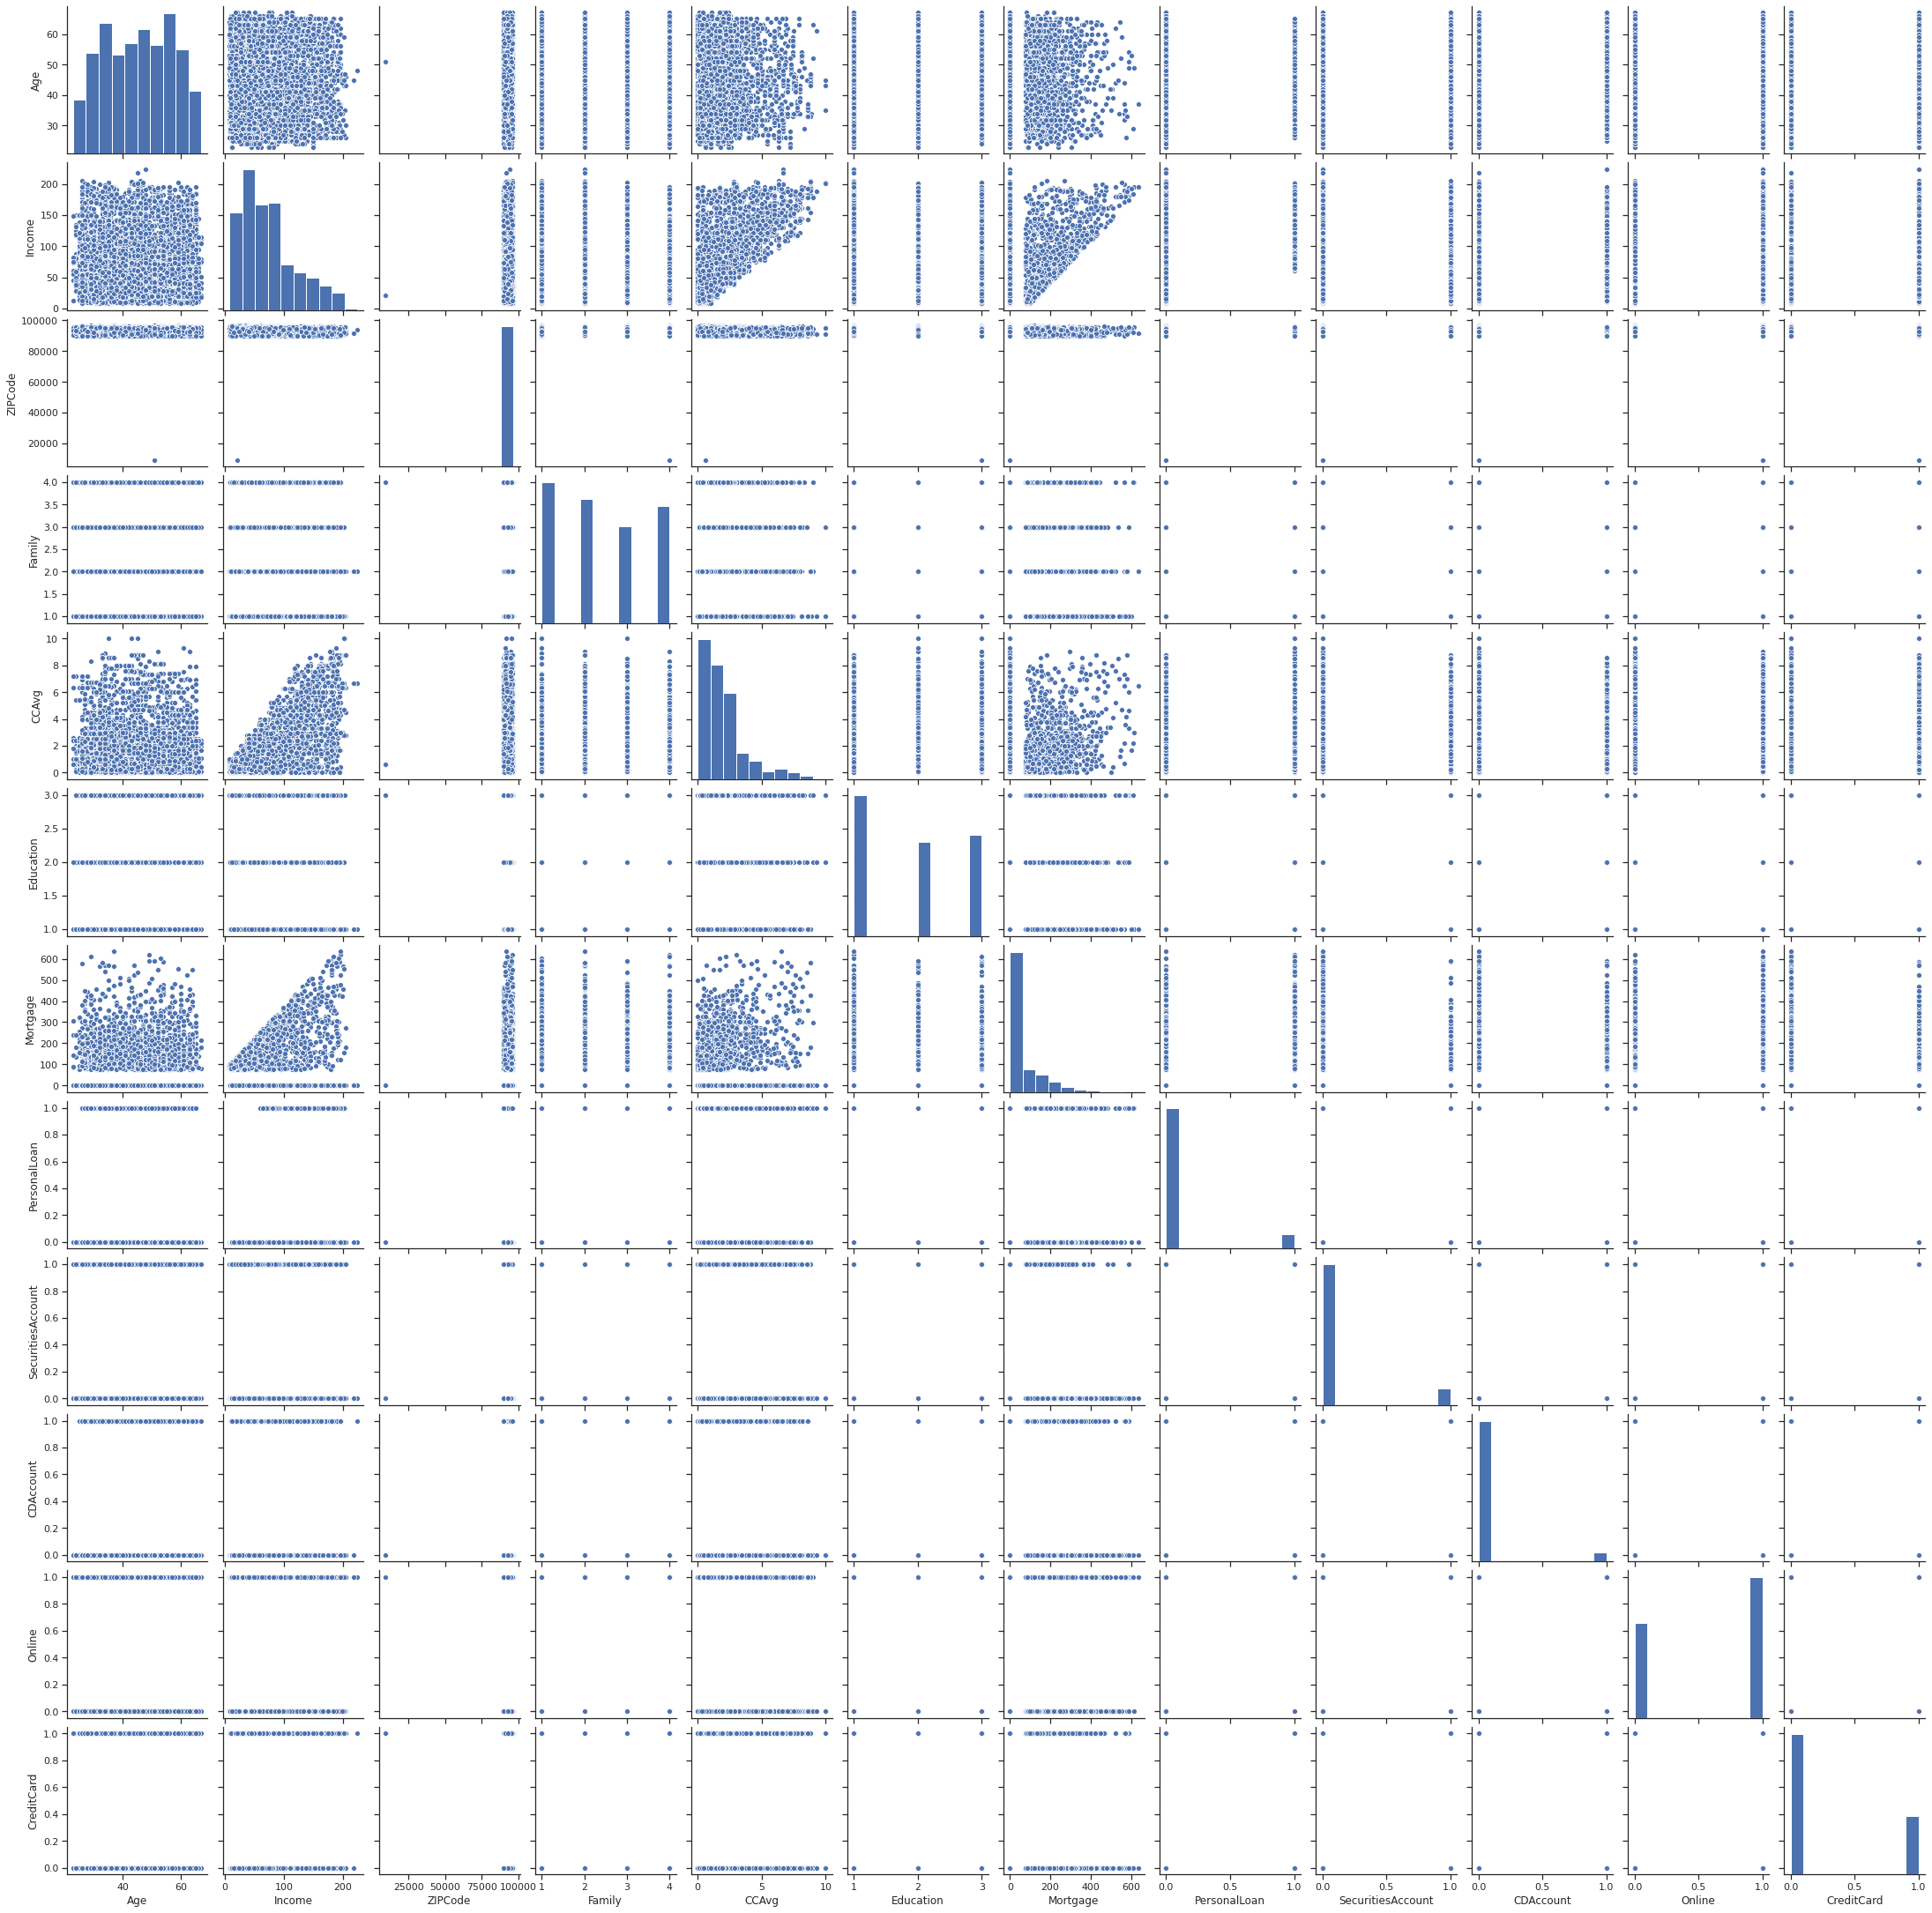

In [ ]:
sns.pairplot(data)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

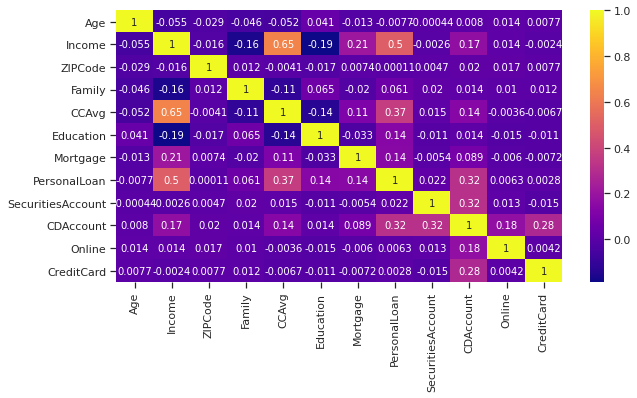

In [ ]:
# Correlation with heat map
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(),cmap='plasma',annot=True)
plt.show()


**Observation :**Income and CCAvg is moderately correlated.



In [252]:
#removing ZIPCode 
data=data.drop(['ZIPCode'],axis=1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**Observation :**Zipcode is a categorical data. Categorical data is classified into nominal and ordinal data.In ordinal data there is an order in the sequence. In case of nominal data there is no order.So ZIPCode is a nominal data.Therefore here we have to do one hot encoding by creating dummy variables.If dummy variables are created here then we'll have 467 new columns and this will create the problem of multicollinearity. To avoid all this it is better to remove the zip code.




# Transformation for feature variable

In [291]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

x = data.loc[:, data.columns != 'PersonalLoan']
y = data.loc[:, data.columns == 'PersonalLoan']

In [292]:
x

,Age,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [293]:
y

,PersonalLoan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [294]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
temp=(pt.transform(x['Income'].values.reshape(-1,1)));

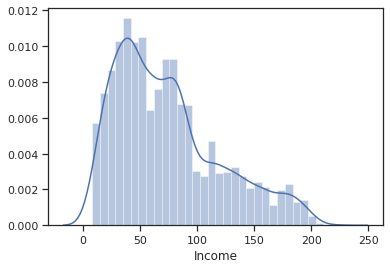

In [295]:
sns.distplot(x['Income'])

**Observation:**Now income is normalized and is ready for use.

In [296]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
temp=(pt.transform(x['CCAvg'].values.reshape(-1,1)));

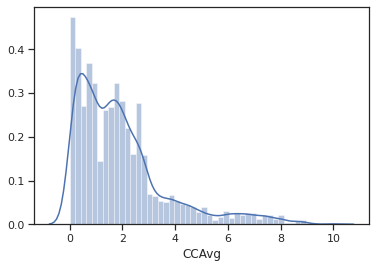

In [297]:
sns.distplot(x['CCAvg'])

**Observation :** We have transformed CCAvg and Income.Now let's transform mortage column.We have found that many values are zero and other only a few.

In [298]:
x['Mortgage_New'] = pd.cut(x['Mortgage'],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
x.drop(['Mortgage'],axis=1,inplace=True)

In [299]:
x.head()

,Age,Income,Family,CCAvg,Education,SecuritiesAccount,CDAccount,Online,CreditCard,Mortgage_New
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0



# Splitting data

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, stratify = y,random_state=0)


In [301]:
x_train.head()

,Age,Income,Family,CCAvg,Education,SecuritiesAccount,CDAccount,Online,CreditCard,Mortgage_New
3789,51,24,3,0.4,1,0,0,1,1,0
758,64,35,1,1.5,2,1,0,0,0,0
2868,52,31,4,1.8,1,0,0,1,1,0
2550,32,20,1,0.5,3,0,0,1,0,1
2150,62,54,1,0.8,1,1,0,0,1,0


In [302]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train)
#scy.transform(y_test)

array([[-0.97265109,  2.31851937, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -1.19253735,
         1.52960605,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -1.19253735,
        -0.65376311, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  0.83854816,
        -0.65376311, -0.47490853]])

# **LOGISTIC REGRESSION:**

In [303]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [304]:
model1.fit(x_train,y_train)
x1_pred_testlr= model1.predict(x_test)
x1_pred_trainlr= model1.predict(x_train)
acc1_train_x= accuracy_score(y_train,x1_pred_trainlr)
acc1_test_x= accuracy_score(y_test,x1_pred_testlr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [305]:
print("Accuracy score for test data:",acc1_test_x)
print("Accuracy score for train data:",acc1_train_x)
print("RECALL:",recall_score(y_test,x1_pred_testlr))
print("PRECISION:",precision_score(y_test,x1_pred_testlr))
print("F1 SCORE:",f1_score(y_test,x1_pred_testlr))
print("ROC AUC SCORE:",roc_auc_score(y_test,x1_pred_testlr))

Accuracy score for test data: 0.9473333333333334
Accuracy score for train data: 0.946
RECALL: 0.6388888888888888
PRECISION: 0.773109243697479
F1 SCORE: 0.6996197718631179
ROC AUC SCORE: 0.8094886922320551


In [306]:
#Viewing confusion metrics of prediction
def graph_cm(actual,predicted):
  cm= confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True, fmt='.2f' , xticklabels=[0,1] , yticklabels =[0,1])
  plt.xlabel("predicted")
  plt.ylabel("actual")
  plt.show()


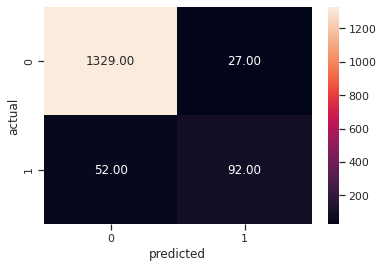

In [307]:
confusion_matrix = graph_cm(y_test,x1_pred_testlr.reshape(-1,1))
confusion_matrix

In [308]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x1_pred_testlr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.77      0.64      0.70       144

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.94      0.95      0.95      1500



# **DECISION TREE:**

Decision trees are a non-parametric supervised learning method used for classification and regression.

In [309]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=8)
model2.fit(x_train,y_train)
x2_pred_testlr= model1.predict(x_test)
x2_pred_trainlr= model1.predict(x_train)
acc2_train_x= accuracy_score(y_train,x2_pred_trainlr)
acc2_test_x= accuracy_score(y_test,x2_pred_testlr)

In [310]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model2,out_file = None,feature_names=['Age','Income','Family','CCAvg','Education','SecuritiesAccount','CDAccount','Online','CreditCard','Mortgage'],filled=True,rounded=True)
graph= graphviz.Source(dot_data)

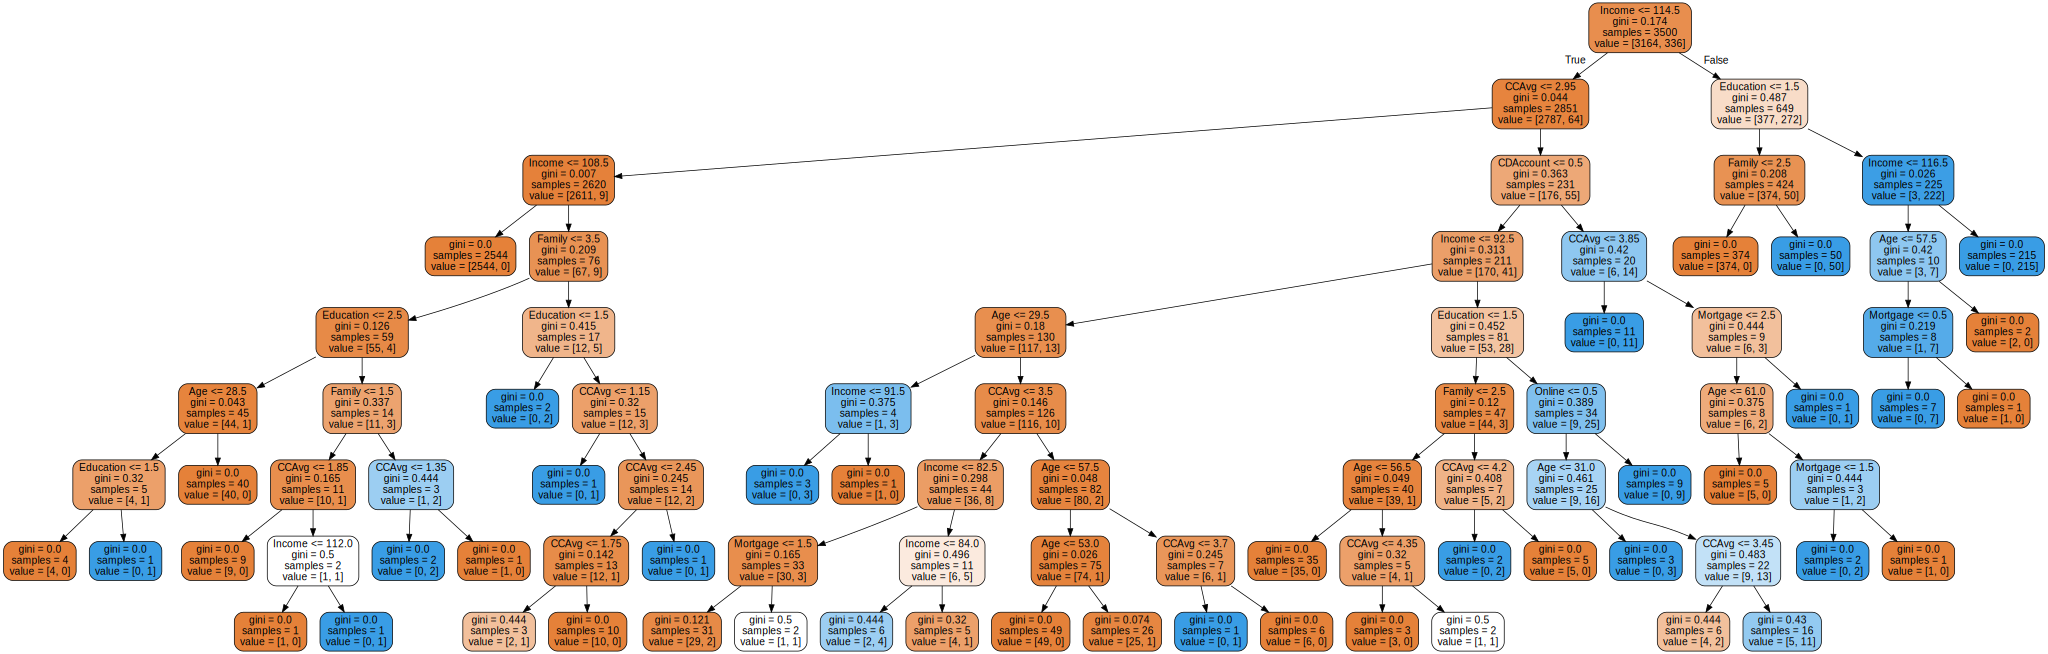

In [311]:
graph

In [312]:
x2_pred_testlr=model2.predict(x_test)
print("Accuracy score for test data:",acc2_test_x)
print("Accuracy score for train data:",acc2_train_x)
print("RECALL:",recall_score(y_test,x2_pred_testlr))
print("PRECISION:",precision_score(y_test,x2_pred_testlr))
print("F1 SCORE:",f1_score(y_test,x2_pred_testlr))
print("ROC AUC SCORE:",roc_auc_score(y_test,x2_pred_testlr))

Accuracy score for test data: 0.9473333333333334
Accuracy score for train data: 0.946
RECALL: 0.8958333333333334
PRECISION: 0.9084507042253521
F1 SCORE: 0.9020979020979022
ROC AUC SCORE: 0.9431231563421829


In [313]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,x2_pred_testlr.reshape(-1,1)))

[[1343   13]
 [  15  129]]


In [314]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x2_pred_testlr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



# **RANDOM FOREST**

Random forest is an ensemble machine learning algorithm.It is most popular and widely used machine learning algorithm known for its good or excellant performance accross a wide range of classification and regression predictive modelling problems

In [315]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=500,max_depth=8)
model3.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [316]:
x3_pred_testlr=model3.predict(x_test)
x3_pred_testlr= model1.predict(x_test)
x3_pred_trainlr= model1.predict(x_train)
acc3_train_x= accuracy_score(y_train,x3_pred_trainlr)
acc3_test_x= accuracy_score(y_test,x3_pred_testlr)

In [317]:
x3_pred_testlr=model3.predict(x_test)
print("Accuracy score for test data:",acc3_test_x)
print("Accuracy score for train data:",acc3_train_x)
print("RECALL:",recall_score(y_test,x3_pred_testlr))
print("PRECISION:",precision_score(y_test,x3_pred_testlr))
print("F1 SCORE:",f1_score(y_test,x3_pred_testlr))
print("ROC AUC SCORE:",roc_auc_score(y_test,x3_pred_testlr))

Accuracy score for test data: 0.9473333333333334
Accuracy score for train data: 0.946
RECALL: 0.8819444444444444
PRECISION: 0.9844961240310077
F1 SCORE: 0.9304029304029303
ROC AUC SCORE: 0.9402347590953786


In [318]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,x3_pred_testlr.reshape(-1,1)))

[[1354    2]
 [  17  127]]


In [319]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x3_pred_testlr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



# **NAIVE BAYES**

Here we can calculate the probability of a piece of data belonging to a given class.Bayes theorm is stated as :

P(class|data) = (P(data|class)*P(class))/P(data)
wher, P(class|data) is the probability of the class given in the provided data.

In [326]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [327]:
x4_pred_testlr=model3.predict(x_test)
x4_pred_testlr= model1.predict(x_test)
x4_pred_trainlr= model1.predict(x_train)
acc4_train_x= accuracy_score(y_train,x4_pred_trainlr)
acc4_test_x= accuracy_score(y_test,x4_pred_testlr)

In [328]:
x3_pred_testlr=model3.predict(x_test)
print("Accuracy score for test data:",acc4_test_x)
print("Accuracy score for train data:",acc4_train_x)
print("RECALL:",recall_score(y_test,x4_pred_testlr))
print("PRECISION:",precision_score(y_test,x4_pred_testlr))
print("F1 SCORE:",f1_score(y_test,x4_pred_testlr))
print("ROC AUC SCORE:",roc_auc_score(y_test,x4_pred_testlr))

Accuracy score for test data: 0.9473333333333334
Accuracy score for train data: 0.946
RECALL: 0.6388888888888888
PRECISION: 0.773109243697479
F1 SCORE: 0.6996197718631179
ROC AUC SCORE: 0.8094886922320551


In [331]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,x4_pred_testlr.reshape(-1,1)))

[[1329   27]
 [  52   92]]


In [332]:
from sklearn.metrics import classification_report
print(classification_report(y_test,x4_pred_testlr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.77      0.64      0.70       144

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.94      0.95      0.95      1500



# **CONCLUSION:**

In the first step of this project we imported various libraries and our data.Then we found out the following things about our data

1)We have to make the model to predict whether a person will take personal loan or not.

2)We found that age and experience are highly correlated so we dropped the experience column.

3)ID and ZIPCode were not contributing factors for a person to take loan so we dropped them.

4)Income and CCAvg column were left skewed so we applied Power transformation to them to make them normalized.

5)The mortage column was skewed but since it was discrete so rather than power transform we use binning method.

After this we used several models to make predictions.

-LOGISTIC REGRESSION

-DECISION TREE

-RANDOM FOREST

-NAIVE BAYES

